In [4]:
!pip3 install quandl

In [10]:
#importing Liberaries
import quandl, math
import numpy as np
import pandas as pd

from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from sklearn.model_selection import train_test_split
style.use('ggplot')

In [11]:
df = pd.read_csv('Stock Data Set.csv')

In [13]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume
0,2.2972,2.3178,2.2972,2.2972,26437
1,2.2972,2.2972,2.2544,2.2759,29887
2,2.2759,2.2759,2.2342,2.2342,106900
3,2.2342,2.2342,2.2342,2.2342,85061
4,2.2342,2.2342,2.2139,2.2139,66669


In [24]:
df['HighLow_PCT'] = (df['High']-df['Low'] )/df['Close']*100.0
df['Change_PCT'] = (df['Close']-df['Open'] )/df['Open']*100.0
df = df[['Close', 'HighLow_PCT', 'Change_PCT', 'Volume']]

In [25]:
df.head()

,Close,HighLow_PCT,Change_PCT,Volume
0,2.2972,0.896744,0.000000,26437
1,2.2759,1.880575,-0.927216,29887
2,2.2342,1.866440,-1.832242,106900
3,2.2342,0.000000,0.000000,85061
4,2.2139,0.916934,-0.908603,66669


In [26]:
pre_col = 'Close'
df.fillna(value=-99999, inplace= True)

In [27]:
pre_out = int(math.ceil(0.0025*len(df)))

In [28]:
df['label'] = df[pre_col].shift(-pre_out)
df.dropna(inplace = True)

In [29]:
x = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [41]:
#data normalization

x = preprocessing.scale(x)
y = np.array(df['label'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [42]:
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [43]:
confidence = clf.score(x_test, y_test)
print(confidence)

0.9668103181224853


In [44]:
#pridiction

x_lately = x[-pre_out:]
df.dropna(inplace=True)
y = np.array(df['label'])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)

#forecast

forecast_set = clf.predict(x_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name


In [51]:
one_day = 86400
next_unix = last_date+one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

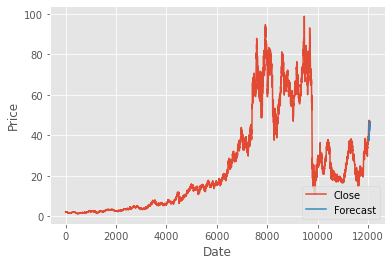

In [56]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel('Price')
plt.show()